# Kevin Kyendy Mauwi

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

This code snippet is importing essential libraries for machine learning and data visualization in Python. It includes TensorFlow for building machine learning models, NumPy for numerical computations, and Matplotlib for creating plots and graphs.

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

This line of code loads the CIFAR-10 dataset using TensorFlow's Keras library, dividing it into training and test sets. It assigns images and labels to variables `X_train`, `y_train` (for training), and `X_test`, `y_test` (for testing) to be used in machine learning tasks, particularly image classification.

The `load_data()` function loads the dataset from the internet (if it's not already downloaded) and returns the data split into training and test sets. The `(X_train, y_train)` tuple contains the training data and labels, while the `(X_test, y_test)` tuple contains the test data and labels.

In [35]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

This code retrieves the first five elements from the `y_train` array, providing a glimpse of the initial class labels in the training dataset.

In [4]:
# convert to 1d array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

These lines of code reshape the `y_train` array from a 2D shape to a 1D shape, making it easier to work with. The second line then displays the first five elements of the modified `y_train` array, now in its 1D form.

In [5]:
y_test = y_test.reshape(-1,)

This line of code reshapes the `y_test` array from a 2D shape to a 1D shape, similar to what was done with the `y_train` array. Reshaping the arrays to 1D is often necessary for compatibility with certain machine learning algorithms and operations.

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

This line of code defines a list named `classes` that contains the names of different categories. In the context of the CIFAR-10 dataset, each class corresponds to a specific type of image. The list includes labels such as 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', and 'truck', which are the categories into which the images in the dataset are classified.

In [7]:
# function to show images
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

This code defines a function called `plot_sample` that displays an image from a dataset along with its corresponding label. The function takes an image dataset (`X`), label array (`y`), and an index as inputs. It uses Matplotlib to create a figure, show the image, and label it based on a predefined class list.

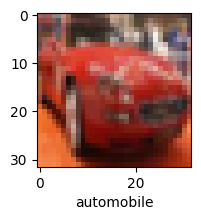

In [8]:
# image example
plot_sample(X_train, y_train, 5)

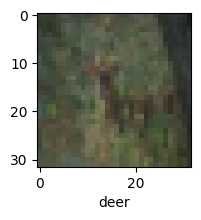

In [9]:
plot_sample(X_train, y_train, 10)

In [10]:
# Normalizing
X_train = X_train / 255.0
X_test = X_test / 255.0

These lines of code perform data normalization on the image datasets `X_train` and `X_test`. Data normalization is a preprocessing step commonly used in machine learning to ensure that all feature values are within a similar scale. In this case, the pixel values of the images are scaled down to a range between 0 and 1 by dividing them by 255. This makes it easier for machine learning algorithms to learn and converge effectively.

In [11]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

ann.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 189s 119ms/step - loss: 1.8098 - accuracy: 0.3583
Epoch 2/5
1563/1563 [==============================] - 182s 117ms/step - loss: 1.6218 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 178s 114ms/step - loss: 1.5410 - accuracy: 0.4548
Epoch 4/5
1563/1563 [==============================] - 180s 115ms/step - loss: 1.4821 - accuracy: 0.4754
Epoch 5/5
1563/1563 [==============================] - 183s 117ms/step - loss: 1.4321 - accuracy: 0.4943


`ann = models.Sequential([...]):` A sequential neural network model (`ann`) is defined using Keras. It consists of several layers, including a flatten layer to reshape the input images, followed by two hidden dense (fully connected) layers with ReLU activation functions, and an output dense layer with softmax activation for classification.

`ann.compile(...):` The model's compilation is configured. The optimizer is set to stochastic gradient descent (`SGD`), the loss function is chosen as sparse categorical cross-entropy, and accuracy is chosen as the evaluation metric.

`ann.fit(...):` The model is trained on the training data (`X_train and y_train`) for a specified number of epochs (in this case, 5 epochs).

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 28ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.66      0.41      0.51      1000
           1       0.66      0.56      0.61      1000
           2       0.43      0.25      0.31      1000
           3       0.28      0.55      0.37      1000
           4       0.57      0.22      0.32      1000
           5       0.46      0.28      0.35      1000
           6       0.50      0.56      0.53      1000
           7       0.48      0.61      0.54      1000
           8       0.50      0.74      0.60      1000
           9       0.53      0.58      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



`from sklearn.metrics import confusion_matrix, classification_report:` The `confusion_matrix` and `classification_report` functions are imported from the sklearn.metrics module. These functions are used to evaluate the performance of a classification model.

`y_pred = ann.predict(X_test):` The trained neural network model (ann) predicts the class probabilities for the test dataset (`X_test`).

`y_pred_classes = [np.argmax(element) for element in y_pred]:` The class with the highest predicted probability is extracted from each prediction in `y_pred`, resulting in a list of predicted class labels.

`print('classification report: \n', classification_report(y_test, y_pred_classes)):` The `classification_report` function is used to generate a detailed classification report based on the true test labels (`y_test`) and the predicted classes (`y_pred_classes`). The report includes metrics such as precision, recall, F1-score, and support for each class.

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

The model begins with a 2D convolutional layer with 32 filters, each of size (3, 3), and ReLU activation. The input shape is set to (32, 32, 3), representing images with a height and width of 32 pixels and 3 color channels.

A max-pooling layer with a pool size of (2, 2) follows the first convolutional layer.

Another convolutional layer with 64 filters of size (3, 3) and ReLU activation is added.

The model is flattened to a 1D array to prepare for fully connected layers.

A dense (fully connected) layer with 64 units and ReLU activation is added.

The final output layer consists of 10 units with softmax activation, suitable for multi-class classification.

In [18]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

These lines configure the CNN model (`cnn`) for training. They set the optimizer to Adam, the loss function to sparse categorical cross-entropy (suitable for classification tasks), and the evaluation metric to accuracy. This prepares the model for learning and assessment during training.

In [19]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 110s 69ms/step - loss: 1.4105 - accuracy: 0.4942
Epoch 2/10
1563/1563 [==============================] - 107s 68ms/step - loss: 1.0477 - accuracy: 0.6316
Epoch 3/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.8901 - accuracy: 0.6895
Epoch 4/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.7818 - accuracy: 0.7288
Epoch 5/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.6845 - accuracy: 0.7628
Epoch 6/10
1563/1563 [==============================] - 110s 71ms/step - loss: 0.5958 - accuracy: 0.7911
Epoch 7/10
1563/1563 [==============================] - 113s 72ms/step - loss: 0.5064 - accuracy: 0.8240
Epoch 8/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.4321 - accuracy: 0.8490
Epoch 9/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.3652 - accuracy: 0.8724
Epoch 10/10
1563/1563 [==============================] -

These lines of code train the previously defined convolutional neural network (CNN) model (`cnn`) using the provided training data (`X_train` and `y_train`) for a total of 10 epochs. The model learns from the data to improve its ability to classify images.

In [20]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 12ms/step - loss: 1.3808 - accuracy: 0.6733


[1.3808221817016602, 0.67330002784729]

This line of code evaluates the performance of the trained convolutional neural network (CNN) model (`cnn`) on the provided test data (`X_test` and `y_test`). It calculates and returns the model's loss value and accuracy on the test dataset.

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[3.7067352e-04, 7.5638154e-09, 1.2774686e-06, 9.2903900e-01,
        4.9874194e-07, 6.9534473e-02, 9.5762382e-04, 1.6132363e-07,
        9.6290925e-05, 2.4545262e-08],
       [1.3088814e-05, 3.0266543e-04, 7.5074631e-13, 2.5578628e-14,
        1.1073868e-13, 1.3383837e-15, 3.7092034e-14, 7.9013223e-20,
        9.9968421e-01, 5.1206250e-08],
       [9.3356436e-01, 3.5229339e-05, 9.6600452e-05, 1.5581433e-04,
        1.3229013e-03, 3.2016239e-06, 2.0086628e-07, 1.9340783e-04,
        6.4333424e-02, 2.9487826e-04],
       [9.9899632e-01, 1.1984324e-07, 1.9002824e-05, 5.3651956e-07,
        2.3669094e-05, 4.3283059e-12, 7.0435741e-10, 9.5669490e-09,
        9.6021645e-04, 2.7540059e-08],
       [2.3781798e-08, 1.4182578e-05, 2.9294853e-04, 2.1700329e-01,
        5.8292928e-03, 2.4397438e-03, 7.7437395e-01, 5.6446976e-09,
        3.5662681e-05, 1.0968659e-05]], dtype=float32)

These lines of code use the trained convolutional neural network (CNN) model (`cnn`) to predict the class probabilities for the test dataset (`X_test`). The variable `y_pred` contains the predicted probabilities for each class for the first five examples in the test set.

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

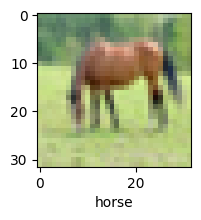

In [30]:
plot_sample(X_test, y_test, 60)

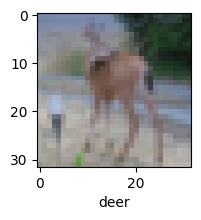

In [31]:
plot_sample(X_test, y_test, 100)

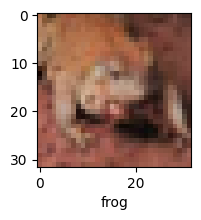

In [33]:
plot_sample(X_test, y_test, 5)

In [34]:
classes[y_classes[5]]

'frog'